## #6 Constructing Efficient frontier

this Jupyter Notebook follows: [YouTube link](https://youtu.be/Usxer0D-WWM), which is based on [the towardsdatascience blog post](https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f):

Here,
1. using Quandl, get several stock data
2. generate randomly weighted portfolio
3. from 2., get Maximum Sharpe Ratio Portfolio Allocation & Minimum Volatility Portfolio Allocation
4. and plot the efficient frontier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

# configure Jupyter Notebook to display matplotlib in high-resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# pip install quandl

# # result
# Collecting quandl
#   Downloading Quandl-3.7.0-py2.py3-none-any.whl (26 kB)
# Requirement already satisfied: pandas>=0.14 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from quandl) (2.0.0)
# Requirement already satisfied: numpy>=1.8 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from quandl) (1.24.2)
# Requirement already satisfied: requests>=2.7.0 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from quandl) (2.29.0)
# Collecting inflection>=0.3.1
#   Downloading inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
# Requirement already satisfied: python-dateutil in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from quandl) (2.8.2)
# Requirement already satisfied: six in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from quandl) (1.16.0)
# Collecting more-itertools
#   Downloading more_itertools-9.1.0-py3-none-any.whl (54 kB)
#      ---------------------------------------- 54.2/54.2 kB 2.7 MB/s eta 0:00:00
# Requirement already satisfied: pytz>=2020.1 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from pandas>=0.14->quandl) (2023.3)
# Requirement already satisfied: tzdata>=2022.1 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from pandas>=0.14->quandl) (2023.3)
# Requirement already satisfied: charset-normalizer<4,>=2 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from requests>=2.7.0->quandl) (3.1.0)
# Requirement already satisfied: idna<4,>=2.5 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from requests>=2.7.0->quandl) (3.4)
# Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from requests>=2.7.0->quandl) (1.26.15)
# Requirement already satisfied: certifi>=2017.4.17 in c:\users\unbes\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (from requests>=2.7.0->quandl) (2022.12.7)
# Installing collected packages: more-itertools, inflection, quandl
# Successfully installed inflection-0.5.1 more-itertools-9.1.0 quandl-3.7.0
# Note: you may need to restart the kernel to use updated packages.

# [notice] A new release of pip available: 22.3.1 -> 23.1.2
# [notice] To update, run: C:\Users\unbes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

     ---------------------------------------- 54.2/54.2 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\unbes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# select stocks for the portfolio
quandl.ApiConfig.api_key = 'c4nWBNKbsz2TsPb8R7Cb'
stocks = ['AMD', 'ATVI', 'INTC', 'EA']
data = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close']},
                        date = { 'gte': '2016-1-1', 'lte': '2017-12-31'},
                        paginate=True)

# check data
data.head()

,date,ticker,adj_close
None,,,
0,2017-12-29,INTC,46.16
1,2017-12-28,INTC,46.22
2,2017-12-27,INTC,46.11
3,2017-12-26,INTC,46.08
4,2017-12-22,INTC,46.70


In [4]:
data

,date,ticker,adj_close
None,,,
0,2017-12-29,INTC,46.160
1,2017-12-28,INTC,46.220
2,2017-12-27,INTC,46.110
3,2017-12-26,INTC,46.080
4,2017-12-22,INTC,46.700
...,...,...,...
2001,2016-01-08,AMD,2.140
2002,2016-01-07,AMD,2.275
2003,2016-01-06,AMD,2.505


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2006 non-null   datetime64[ns]
 1   ticker     2006 non-null   object        
 2   adj_close  2006 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 47.1+ KB


In [6]:
# change df index to `date`
df = data.set_index('date')
df

,ticker,adj_close
date,,
2017-12-29,INTC,46.160
2017-12-28,INTC,46.220
2017-12-27,INTC,46.110
2017-12-26,INTC,46.080
2017-12-22,INTC,46.700
...,...,...
2016-01-08,AMD,2.140
2016-01-07,AMD,2.275
2016-01-06,AMD,2.505


In [7]:
# put ticker in column headers
table = df.pivot(columns='ticker')
table.columns = [col[1] for col in table.columns]
table.head()

,AMD,ATVI,EA,INTC
date,,,,
2016-01-04,2.770,37.094471,66.10,31.810946
2016-01-05,2.750,36.621176,64.94,31.661204
2016-01-06,2.505,36.276065,63.68,30.959285
2016-01-07,2.275,35.763330,62.46,29.798780
2016-01-08,2.140,35.211152,63.13,29.489936


Text(0, 0.5, 'price in $')

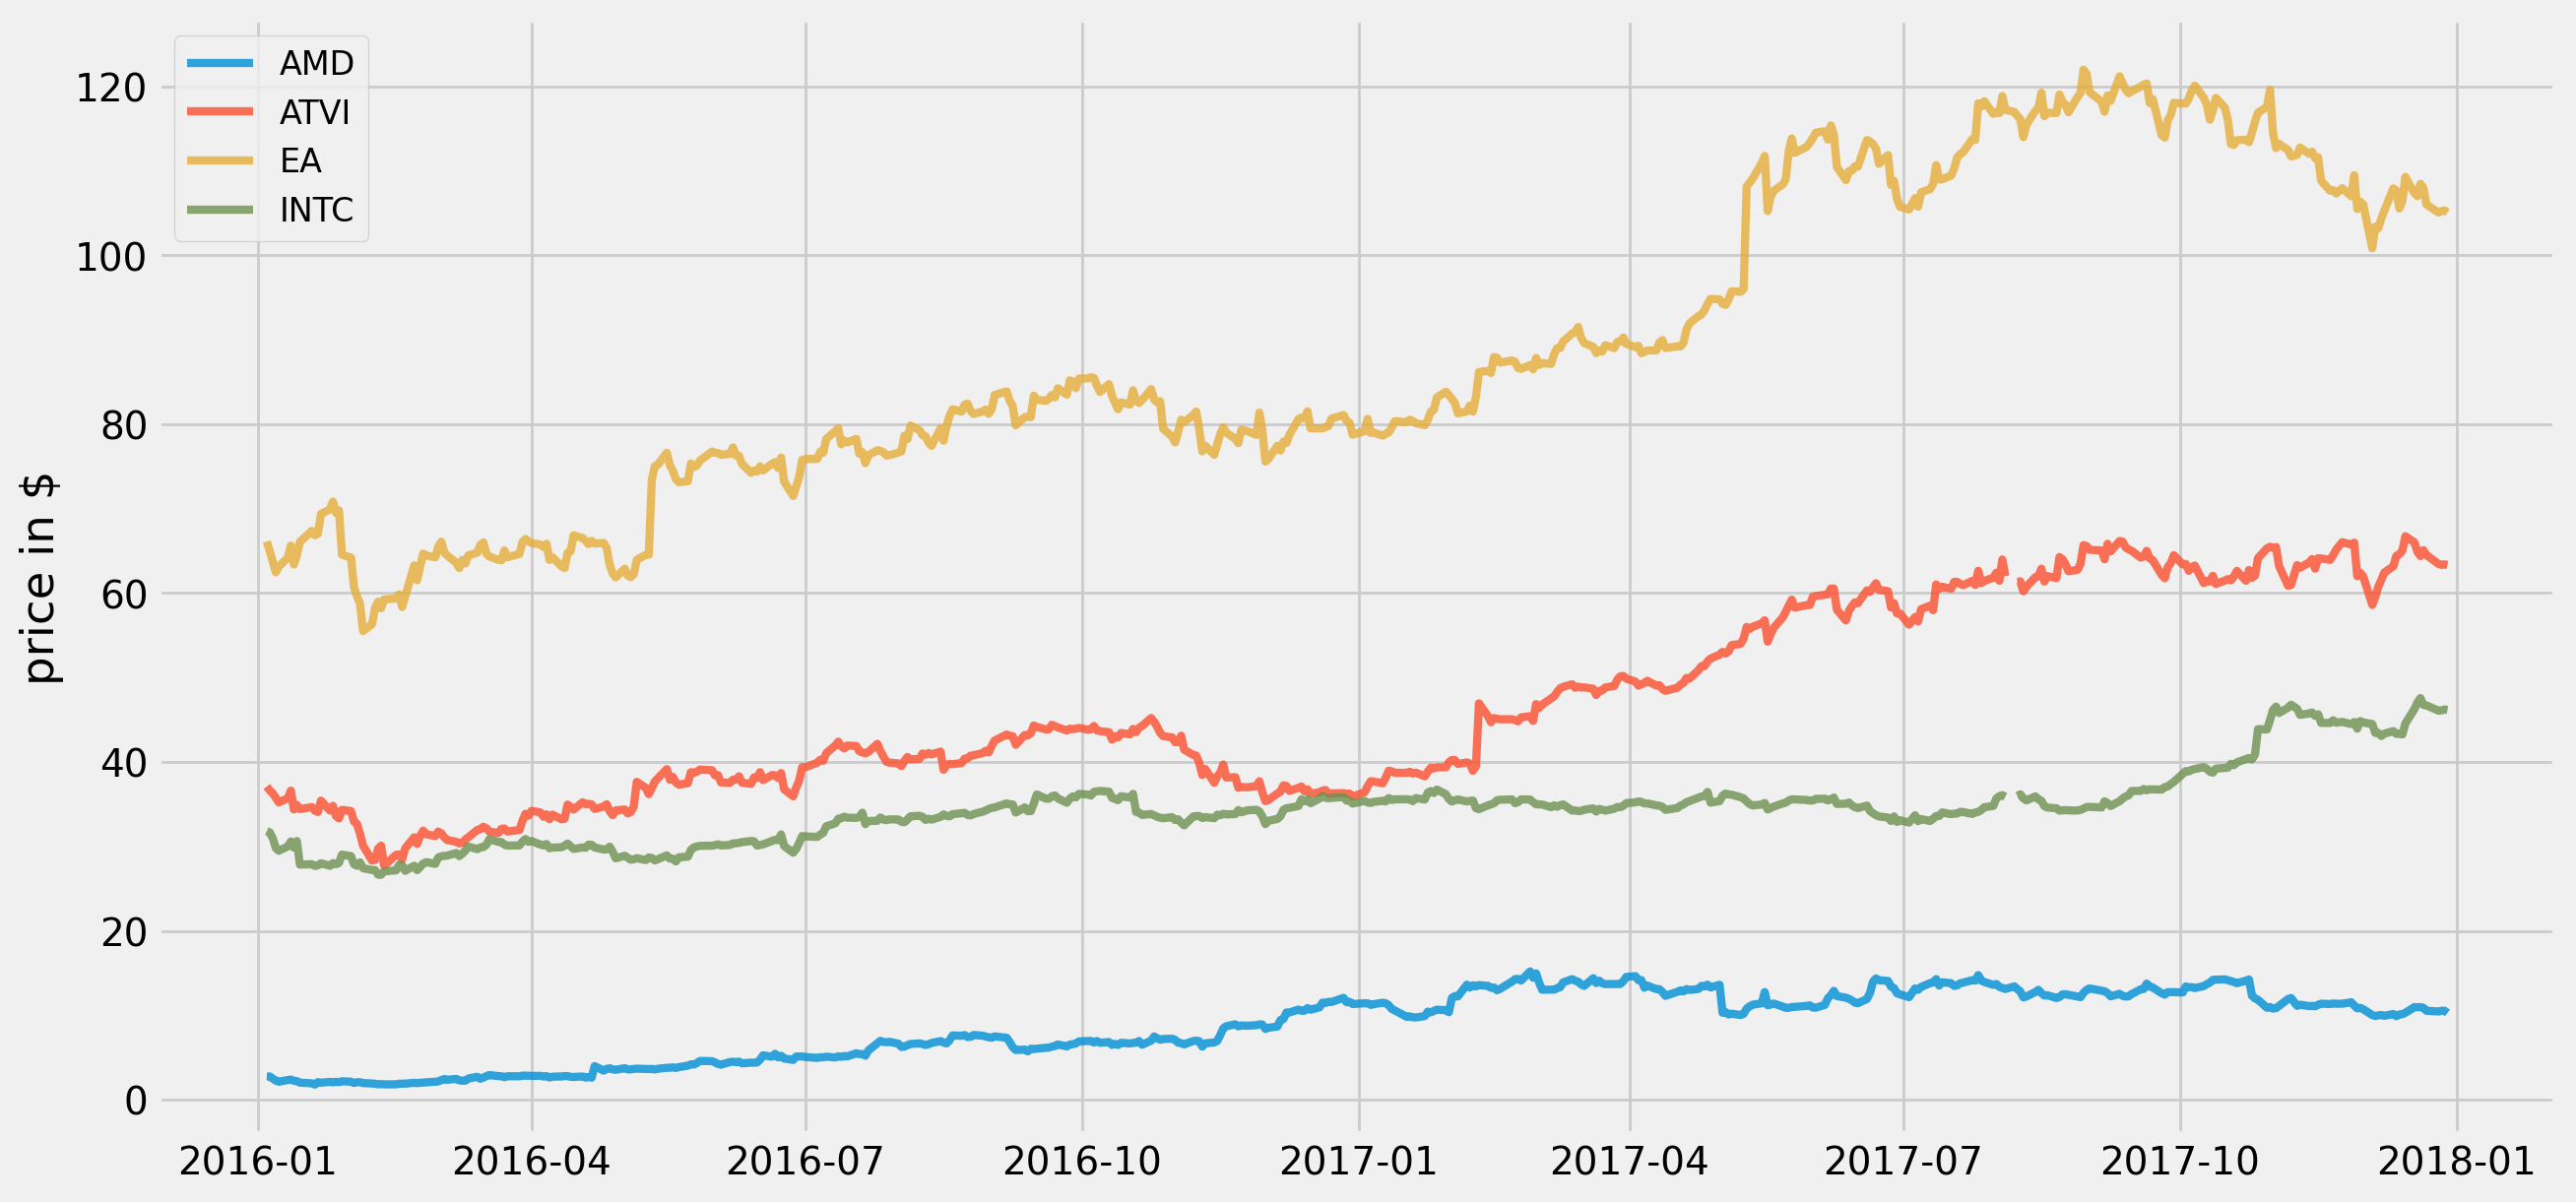

In [8]:
# analyze stock prices over time
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

not good for analyze!

Let's create a table of percentage change.

(A logarithmic table could be used for analysis as well.)

Text(0, 0.5, 'daily returns')

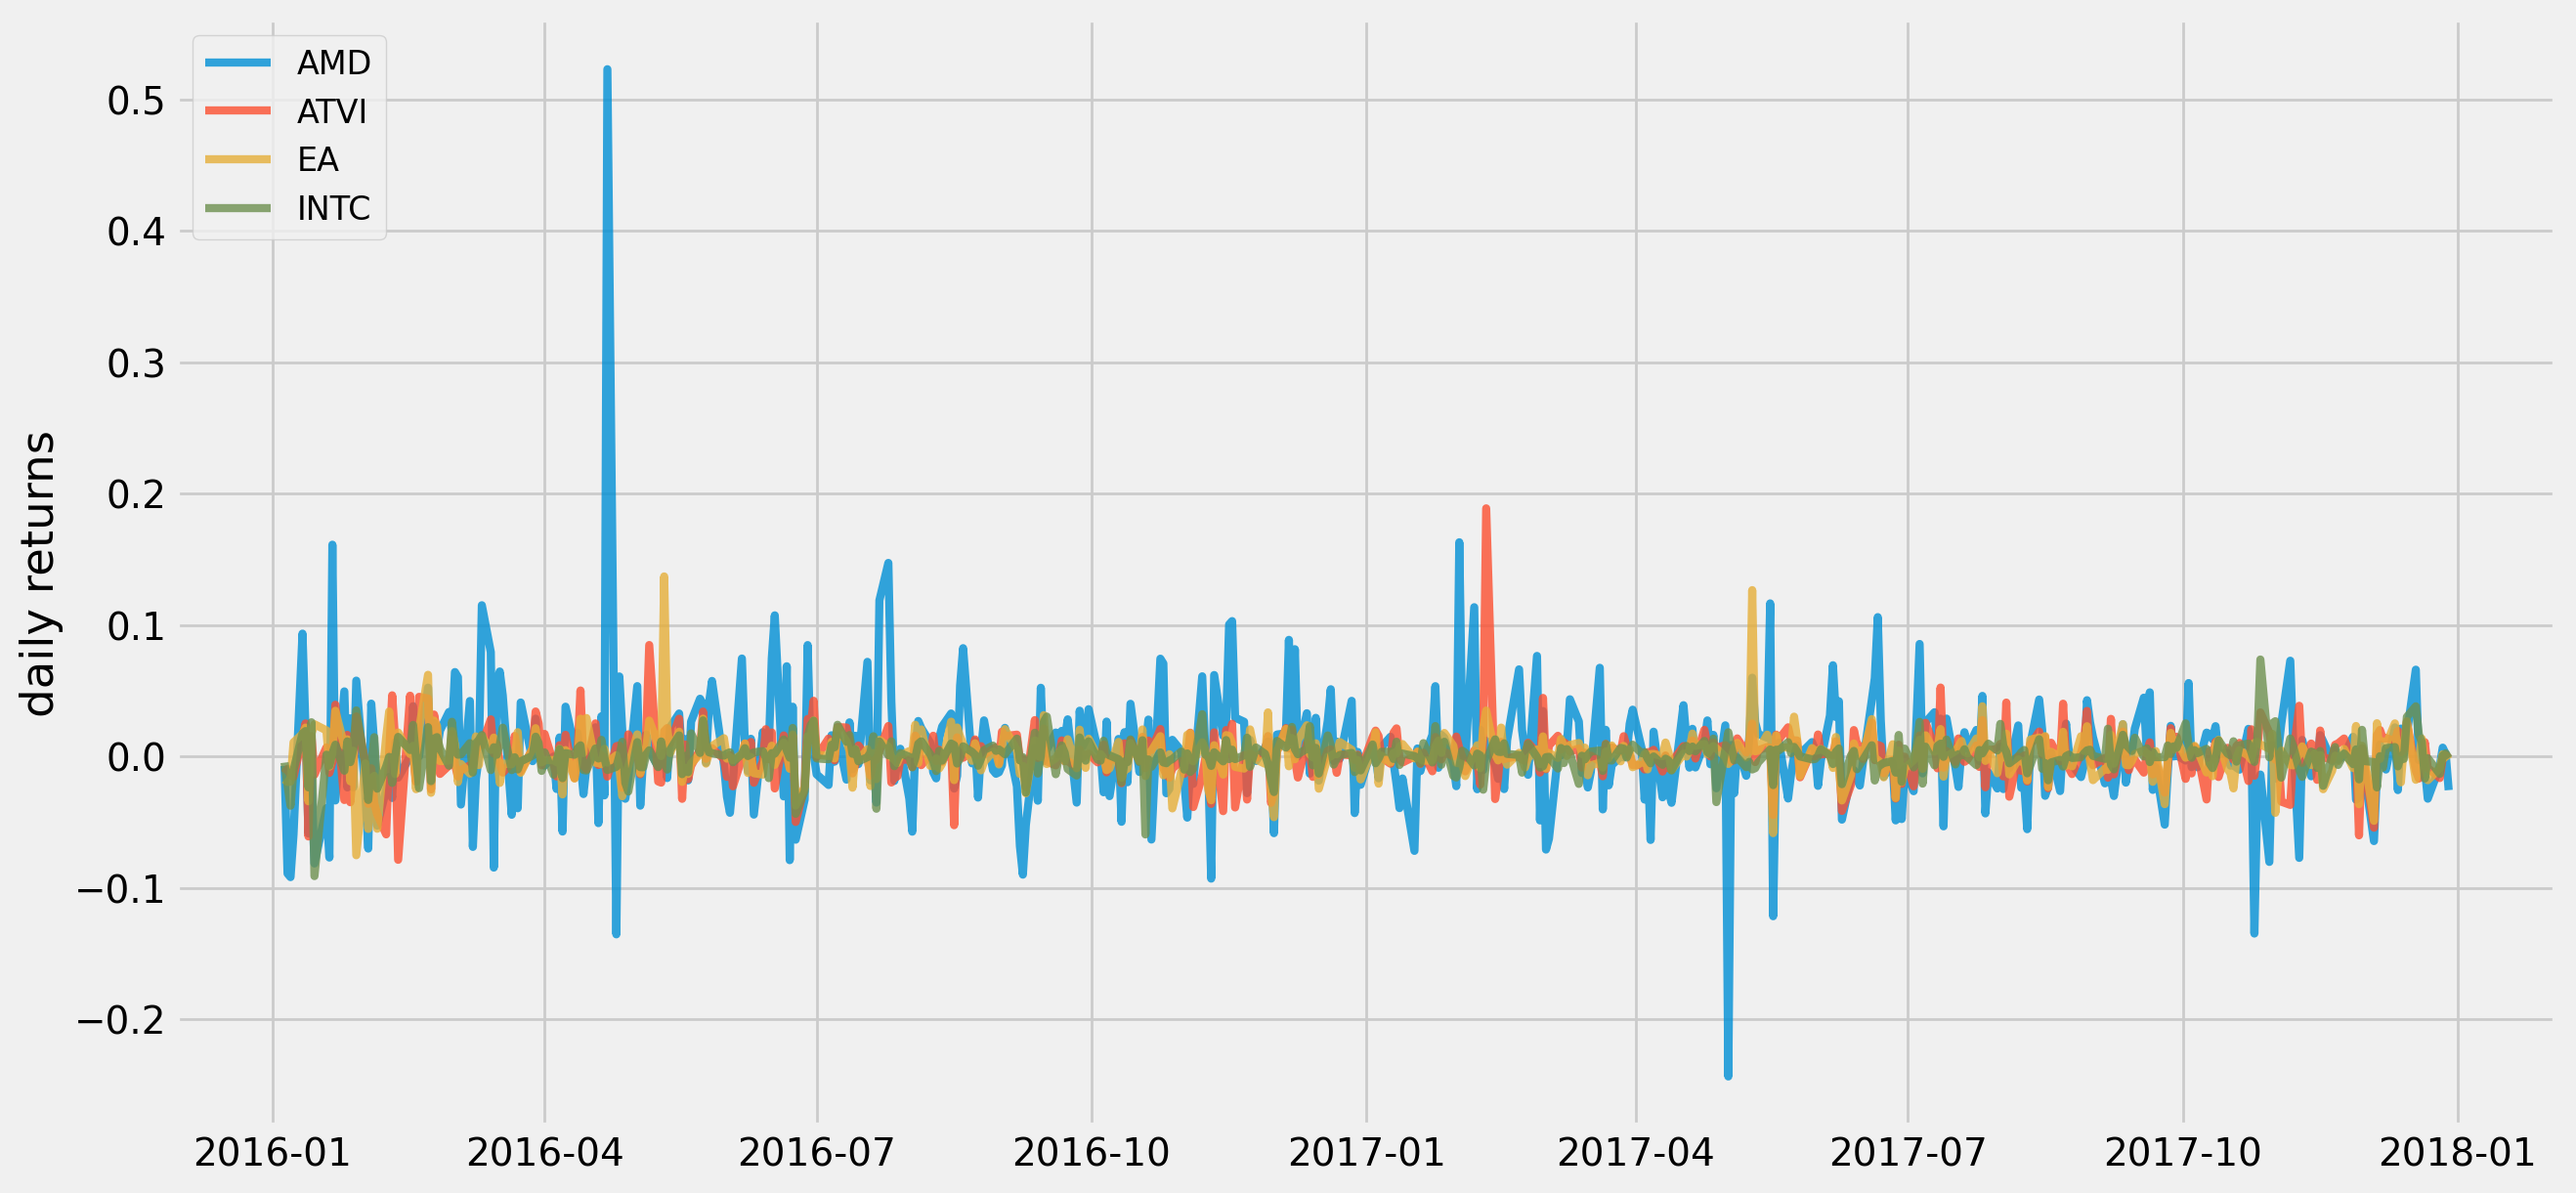

In [9]:
# percentage change
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('daily returns')

AMD has the highest volatility.

In [10]:
returns.head()

,AMD,ATVI,EA,INTC
date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.007220,-0.012759,-0.017549,-0.004707
2016-01-06,-0.089091,-0.009424,-0.019403,-0.022170
2016-01-07,-0.091816,-0.014134,-0.019158,-0.037485
2016-01-08,-0.059341,-0.015440,0.010727,-0.010364


### *portfolio selection*

Now generate randomly weighted portfolios to plot and measure Sharpe ratios. If thousands of portfolios are generated, we should get very close to an optimized portfolio.



In [11]:
# 
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [24]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfollio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfollio_return
        results[2,i] = (portfollio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [13]:
# initial values(inputs)
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

cov_matrix

,AMD,ATVI,EA,INTC
AMD,0.002125,0.000162,0.000154,0.000140
ATVI,0.000162,0.000380,0.000177,0.000066
EA,0.000154,0.000177,0.000286,0.000050
INTC,0.000140,0.000066,0.000050,0.000159


In [28]:
# generate & plot an efficient frontier
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=table.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=table.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)

    # plotting
    plt.figure(figsize=(10,7))
    plt.scatter(results[0,:],results[1,:],c=results[2:,],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum Volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.38
Annualised Volatility: 0.23


              AMD   ATVI     EA   INTC
allocation  19.27  22.25  20.53  37.95
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.24
Annualised Volatility: 0.18


             AMD   ATVI     EA   INTC
allocation  0.76  10.15  25.12  63.96


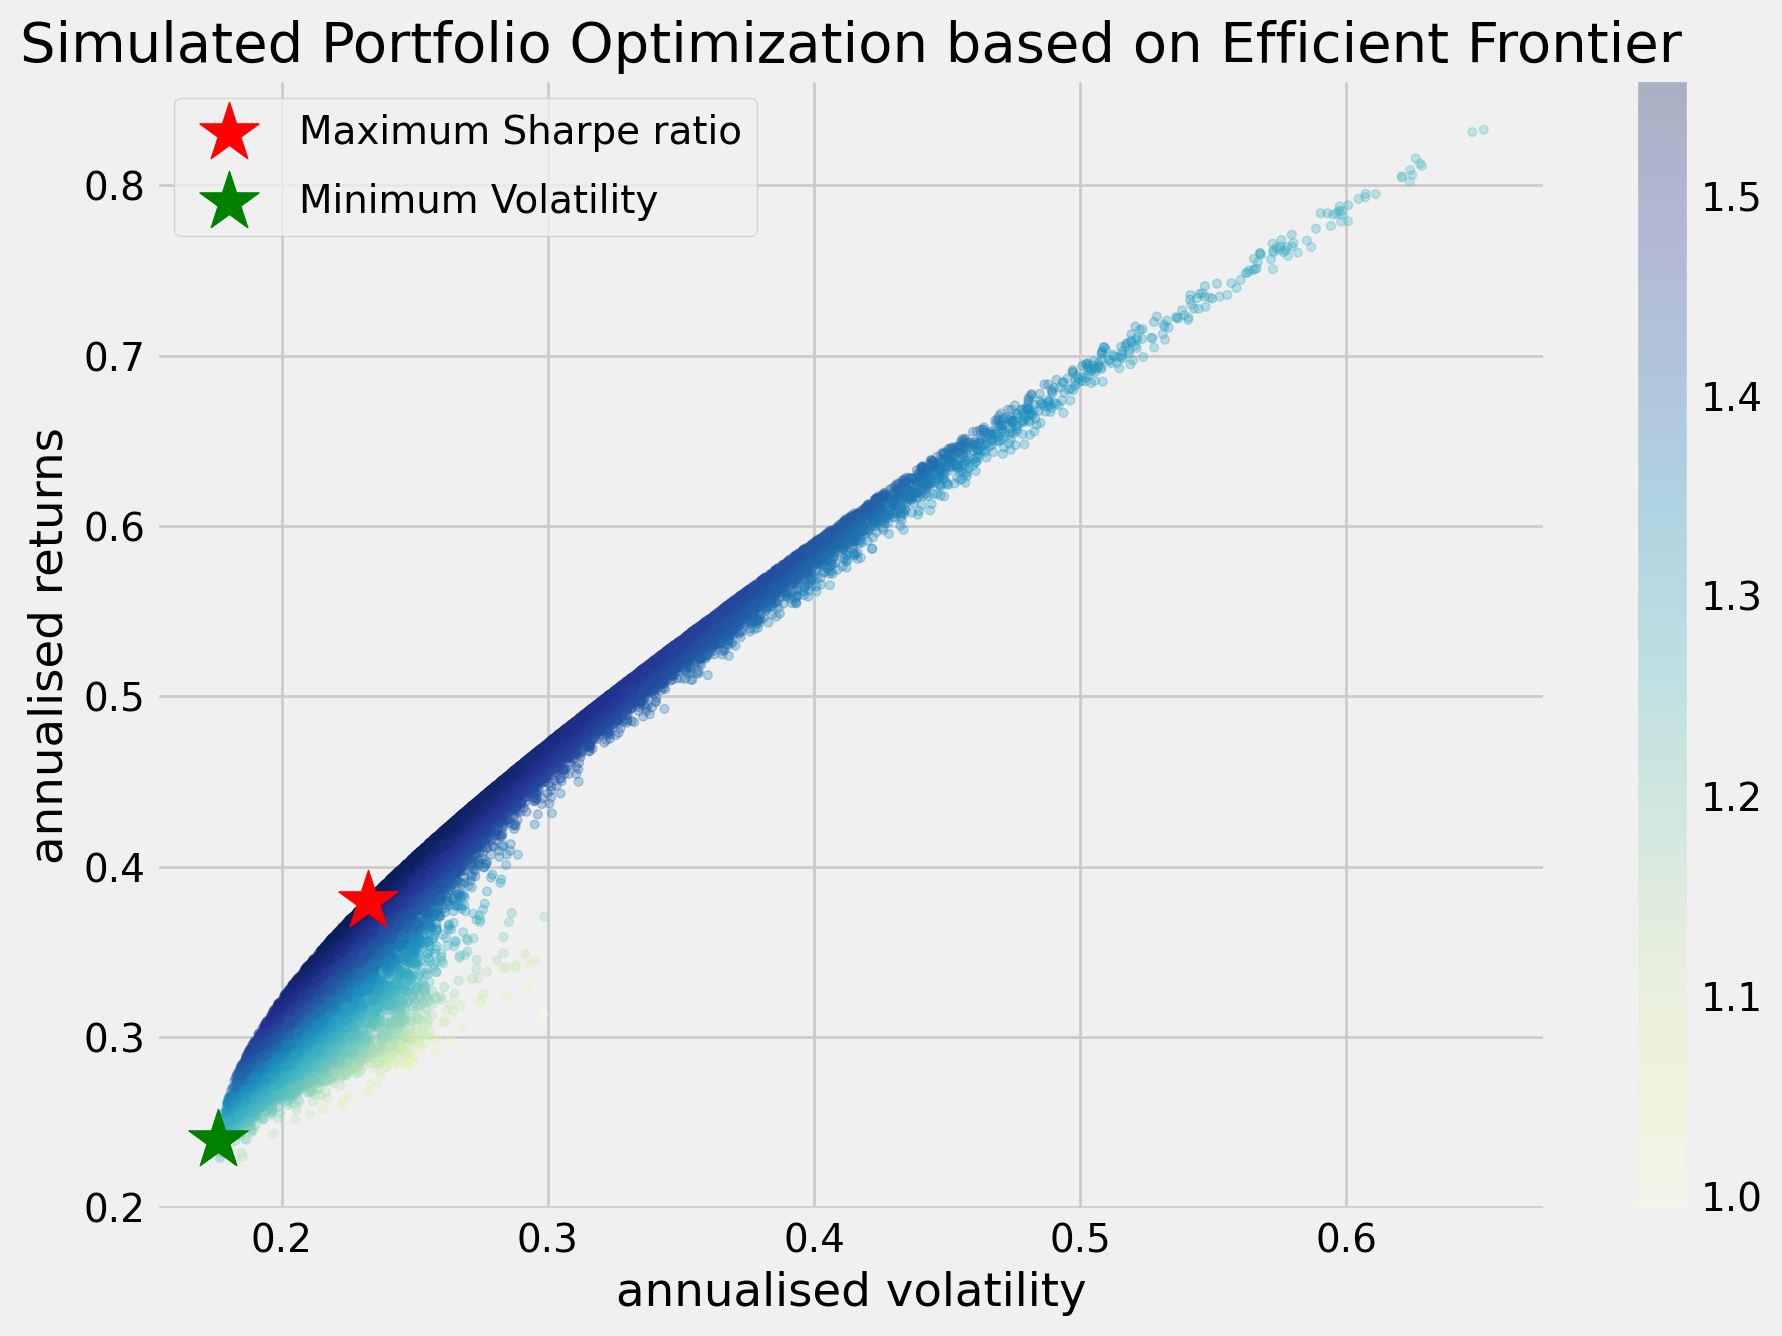

In [29]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Recall the AMD has the highest volatility during given time horizon: this result is illustrated in 'Minimum Volatility Portfolio Allocation' part, which assigns 0.76 allocation for AMD in our 4-stocks (volatility-minimizing) portfolio.

Another note: the shape of this efficient frontier looks bit goofy, for: AMD, ATVI, EA, and INTC are inside closey-related industry: gaming industry or PC-related industry.

okay let's do the same for AAPL, AMZN, FB(now META), & GOOGL, as written in the [blog post](https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f).